### Régression Linéaire :

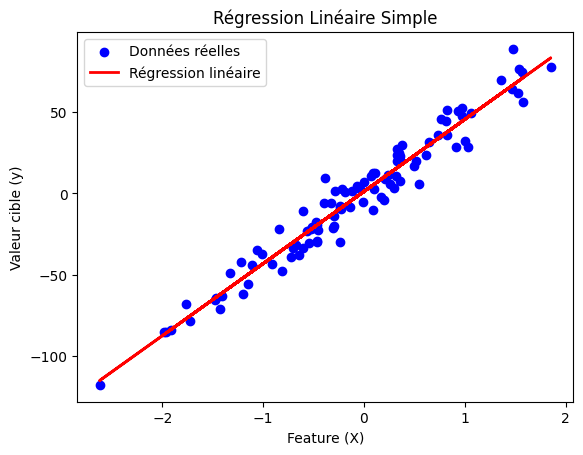

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Génération d'un dataset de régression simple
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Initialisation et entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Prédiction des valeurs
y_pred = model.predict(X)

# Visualisation des résultats
plt.scatter(X, y, color='blue', label='Données réelles')  # Points réels
plt.plot(X, y_pred, color='red', linewidth=2, label='Régression linéaire')  # Droite de régression
plt.xlabel("Feature (X)")
plt.ylabel("Valeur cible (y)")
plt.title("Régression Linéaire Simple")
plt.legend()
plt.show()


### Régression Polynomiale : 

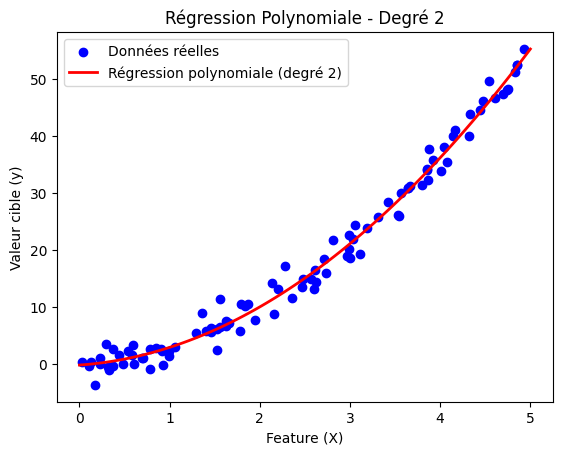

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Génération de données non linéaires
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 2 * X**2 + X + np.random.randn(100, 1) * 2  # Relation quadratique avec du bruit

# Création du modèle de régression polynomiale (degré 2)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entraînement du modèle
model.fit(X, y)

# Prédiction des valeurs
X_test = np.linspace(0, 5, 100).reshape(-1, 1)  # Générer des points pour tracer la courbe
y_pred = model.predict(X_test)

# Visualisation des résultats
plt.scatter(X, y, color='blue', label="Données réelles")  # Points réels
plt.plot(X_test, y_pred, color='red', linewidth=2, label=f"Régression polynomiale (degré {degree})")  # Courbe ajustée
plt.xlabel("Feature (X)")
plt.ylabel("Valeur cible (y)")
plt.title(f"Régression Polynomiale - Degré {degree}")
plt.legend()
plt.show()


### Régression Linéaire Multidimensionnelle

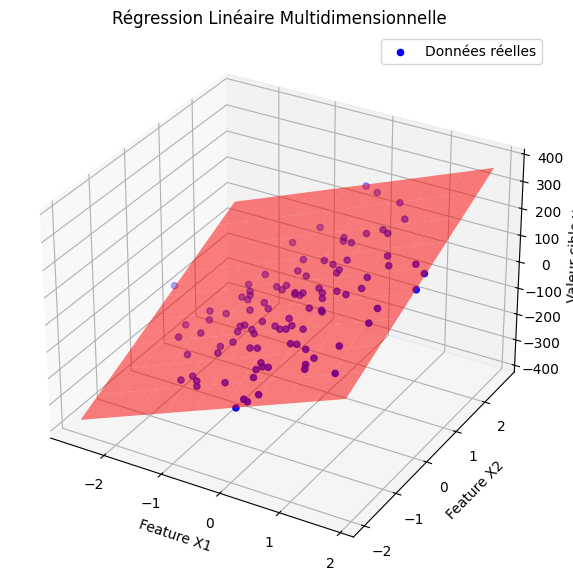

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

# Génération de données de régression avec 2 features (X1, X2)
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Création et entraînement du modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X, y)

# Prédiction des valeurs
y_pred = model.predict(X)

# Visualisation en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Données réelles
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label="Données réelles")

# Surface de régression (prédictions)
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

# Axes labels
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Valeur cible y")
ax.set_title("Régression Linéaire Multidimensionnelle")

plt.legend()
plt.show()


### Régression Linéaire avec Régularisation (L1  , L2):

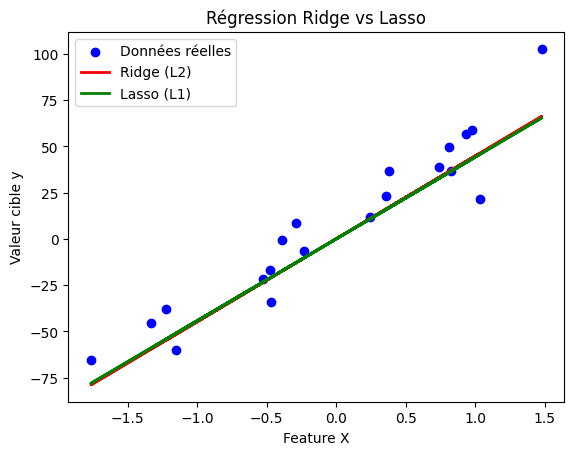

Erreur Ridge (MSE) : 236.72
Erreur Lasso (MSE) : 239.04


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Génération de données de régression
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles Ridge et Lasso
ridge_model = Ridge(alpha=1.0)  # L2
lasso_model = Lasso(alpha=1.0)  # L1

# Entraînement
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Prédictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Affichage des résultats
plt.scatter(X_test, y_test, color='blue', label="Données réelles")
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label="Ridge (L2)")
plt.plot(X_test, y_pred_lasso, color='green', linewidth=2, label="Lasso (L1)")
plt.xlabel("Feature X")
plt.ylabel("Valeur cible y")
plt.title("Régression Ridge vs Lasso")
plt.legend()
plt.show()

# Erreurs
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Erreur Ridge (MSE) : {ridge_mse:.2f}")
print(f"Erreur Lasso (MSE) : {lasso_mse:.2f}")
